# Face recognition using Logistic Regression
The idea is to make a face recognition model using exactly logistic regression. 
This will not be a good face detection model, but this will be a face recognition model.

The datasets used are:
 - https://www.kaggle.com/datasets/atulanandjha/lfwpeople
 - https://www.kaggle.com/datasets/lasaljaywardena/animal-images-dataset

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression

# Data Preprocessing

Reshaping all images to (128,128)

In [2]:
'''
import os
face_dir = '/home/arjun/Desktop/Datasets/Face Detection/Faces'
non_face_dir = '/home/arjun/Desktop/Datasets/Face Detection/Not Faces'
source_dir = non_face_dir 
destination_dir = '/home/arjun/Desktop/Datasets/new_images' 

target_size = (128, 128)
os.makedirs(destination_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    if filename.lower().endswith('.jpg'):
        image_path = os.path.join(source_dir, filename)
        img = cv2.imread(image_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            destination_path = os.path.join(destination_dir, filename)
            cv2.imwrite(destination_path, resized_img)
'''
print("This code cleans up the dataset, by changing their size to 128X128. This is commented, because it has to be used only once")

This code cleans up the dataset, by changing their size to 128X128. This is commented, because it has to be used only once


Playing with Dataset

(128, 128, 3)


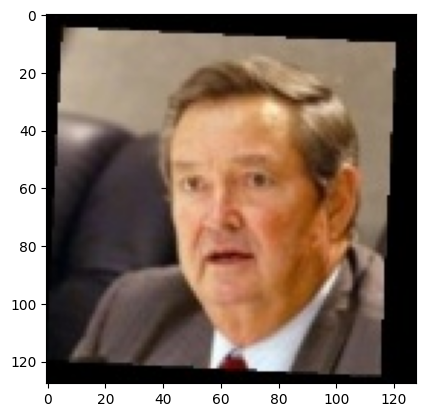

In [3]:
path = '/home/arjun/Desktop/Datasets/Face Detection/All Faces/E_Clay_Shaw_0001.jpg' # Path to image
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)   
print(image.shape)          

(128, 128, 3)


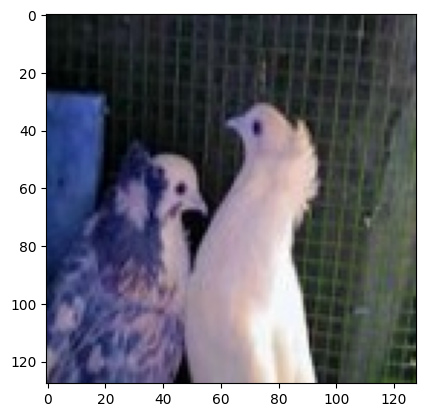

In [4]:
path = '/home/arjun/Desktop/Datasets/Face Detection/All Non Faces/1633802584634_Apple Konda Pigeon for sale.jpg' # Path to image
image = cv2.imread(path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 
print(image.shape)          

Train test split 

In [5]:
'''import os
import shutil
import random
source_dir = '/home/arjun/Desktop/Datasets/Face Detection/All Non Faces'
destination_dir = '/home/arjun/Desktop/Datasets/Face Detection/non_faces_train'
num_files_to_move = 5000
all_files = os.listdir(source_dir)
files_to_move = random.sample(all_files, num_files_to_move)
for filename in files_to_move:
    source_path = os.path.join(source_dir, filename)
    destination_path = os.path.join(destination_dir, filename)
    
    # Move the file from the source to the destination directory
    shutil.move(source_path, destination_path)
'''
print("Created train test split with 5000 train images and 500 test images.")

Created train test split with 5000 train images and 500 test images.


Convert dataset into usable format (np array)

In [6]:
source_dir = '/home/arjun/Desktop/Datasets/Face Detection/faces_train'
image_list = []
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.jpg')): 
        image_path = os.path.join(source_dir, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = img / 255.0  # normalise
            image_list.append(img)

X_train1 = np.array(image_list)

In [7]:
source_dir = '/home/arjun/Desktop/Datasets/Face Detection/non_faces_train'
image_list = []
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.jpg')): 
        image_path = os.path.join(source_dir, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = img / 255.0  # normalise
            image_list.append(img)

X_train2 = np.array(image_list)

In [8]:
source_dir = '/home/arjun/Desktop/Datasets/Face Detection/faces_test'
image_list = []
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.jpg')): 
        image_path = os.path.join(source_dir, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = img / 255.0  # normalise
            image_list.append(img)

X_test1 = np.array(image_list)

In [9]:
source_dir = '/home/arjun/Desktop/Datasets/Face Detection/non_faces_test'
image_list = []
for filename in os.listdir(source_dir):
    if filename.lower().endswith(('.jpg')): 
        image_path = os.path.join(source_dir, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = img / 255.0  # normalise
            image_list.append(img)

X_test2 = np.array(image_list)

In [10]:
y_train1 = np.array([1 for i in range(5000)])
y_train2 = np.array([0 for i in range(5000)])
y_test1 = np.array([1 for i in range(500)])
y_test2 = np.array([0 for i in range(500)])

In [11]:
X_train1.shape, X_train2.shape, y_train1.shape, y_train2.shape

((5000, 128, 128, 3), (5000, 128, 128, 3), (5000,), (5000,))

In [12]:
X_train = np.concatenate((X_train1, X_train2)).reshape(-1, 128*128*3)
y_train = np.concatenate((y_train1, y_train2))
X_test = np.concatenate((X_test1, X_test2)).reshape(-1, 128*128*3)
y_test = np.concatenate((y_test1, y_test2))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 49152) (10000,)
(1000, 49152) (1000,)


Thus, we have the numpy representation of the dataset.

# Model Creation

In [13]:
num_samples = X_train.shape[0]
model = LogisticRegression()

model.fit(X_train, y_train)

/home/arjun/AI_ENV/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_train, y_train)

1.0

In [16]:
model.score(X_test, y_test)

0.984

In [18]:
import joblib
joblib.dump(model, 'Trained_face_reco_model.pkl')

['Trained_face_reco_model.pkl']